In [1]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

In [2]:
import os

In [3]:
os.path.basename(url)

'housing.tgz'

In [1]:
import pandas as pd

In [10]:
##put r in front of the = r"b:\jupyter....." so you don't have to put \\
dir = "B:\\jupyternotebook\\mlboot\\mlprojectpipelines\\tutorial1\\tutorial_project\\housing\\artifact\\data_ingestion\\2022-19-03_14-19-15\\raw_data\\housing.csv"
df = pd.read_csv(dir)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# pip install matplotlib

In [12]:
import matplotlib,numpy as np
df["income_cat"] = pd.cut(df["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<AxesSubplot: ylabel='Frequency'>

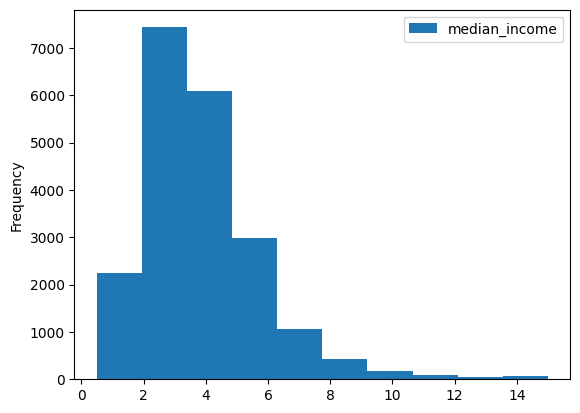

In [13]:
import matplotlib.pyplot as plt
df[["median_income"]].plot(kind="hist")

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
splitfunc = StratifiedShuffleSplit(n_splits=1,test_size=0.2)

In [31]:
df[["income_cat"]].value_counts()

income_cat
3             7236
2             6581
4             3639
5             2362
1              822
dtype: int64

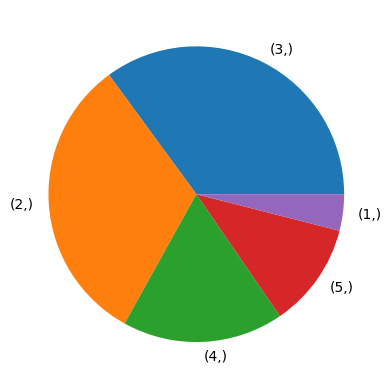

In [24]:
plt.pie(df[["income_cat"]].value_counts(),labels=df[["income_cat"]].value_counts().index)
plt.show()

In [26]:
for train_index,test_index in splitfunc.split(df,df['income_cat']):
    
    strat_train_split = df.loc[train_index].drop(["income_cat"],axis=1)
    strat_test_split = df.loc[test_index].drop(["income_cat"],axis=1)

<AxesSubplot: ylabel='Frequency'>

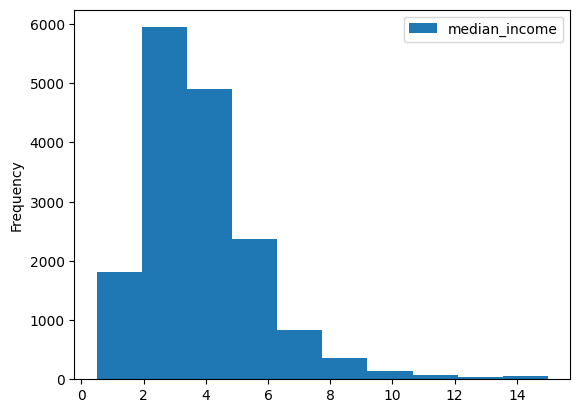

In [29]:
strat_train_split[["median_income"]].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

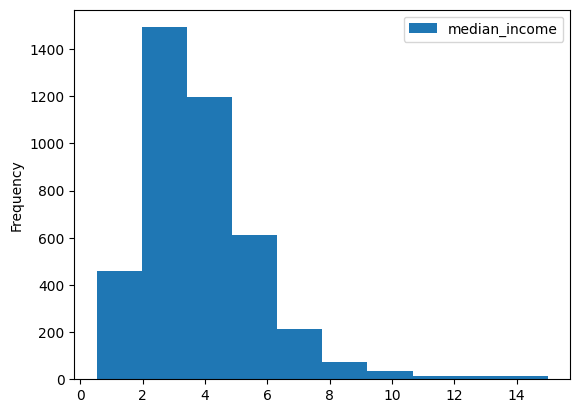

In [30]:
strat_test_split[["median_income"]].plot(kind="hist")

In [35]:
#schema preparation
df.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [39]:
dtypes_of_columns = list(map(lambda x:str(x).replace("dtype('","").replace("')",""),df.dtypes.values))

In [45]:
schema_of_the_data = dict(zip(df.columns.values,dtypes_of_columns))
schema_of_the_data

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}